###Week 7 Discussion - Created by Ali Hatamizadeh 

###Import Dependencies 

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

# Subset of Kaggle Cat and Dog Dataset 

In [0]:
# Subset of Kaggle Cat and Dog Dataset 
!git clone https://github.com/ahatamiz/dog-cat-full-dataset.git
test_data_dir = '/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Counting objects: 100% (25027/25027), done.
remote: Compressing objects: 100% (25022/25022), done.
remote: Total 25027 (delta 5), reused 25020 (delta 3), pack-reused 0
Receiving objects: 100% (25027/25027), 541.62 MiB | 36.48 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [0]:
datagen=ImageDataGenerator(rescale=1./255)
img_width=32
img_height=32
batch_size=20

train_generator=datagen.flow_from_directory(directory=train_data_dir,
                                            target_size=(img_width,img_height),
                                            classes=['dogs','cats'],
                                            class_mode='binary',
                                            batch_size=batch_size)

validation_generator=datagen.flow_from_directory(directory=test_data_dir,
                                                 target_size=(img_width,img_height),
                                            classes=['dogs','cats'],
                                            class_mode='binary',
                                            batch_size=batch_size)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


###Building the Simplest CNN Architecture Ever


In [0]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal',input_shape=(img_width,img_height,3)))

model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))

model.add(Dense(1,activation='sigmoid'))



###Optimization and Compiling the Model


In [0]:
from tensorflow.keras.optimizers import SGD
opt=SGD(learning_rate=0.01,momentum=0.9)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator
                            ,validation_steps=len(validation_generator),verbose=1)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1000/1000 [==============================] - 61s 61ms/step - loss: 0.6996 - accuracy: 0.5084 - val_loss: 0.6933 - val_accuracy: 0.5112
Epoch 2/5
1000/1000 [==============================] - 60s 60ms/step - loss: 0.6720 - accuracy: 0.5788 - val_loss: 0.6130 - val_accuracy: 0.6672
Epoch 3/5
1000/1000 [==============================] - 64s 64ms/step - loss: 0.5703 - accuracy: 0.7038 - val_loss: 0.5499 - val_accuracy: 0.7240
Epoch 4/5
1000/1000 [==============================] - 68s 68ms/step - loss: 0.5129 - accuracy: 0.7458 - val_loss: 0.5326 - val_accuracy: 0.7340
Epoch 5/5
1000/1000 [==============================] - 65s 65ms/step - loss: 0.4693 - accuracy: 0.7753 - val_loss: 0.5678 - val_accuracy: 0.7264


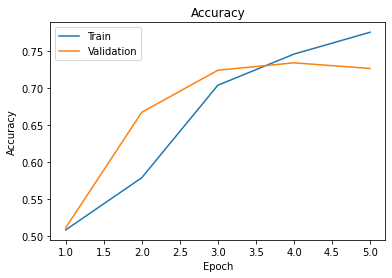

In [0]:
def plot_learningCurve(history):
  epoch_range = range (1,6)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])

  plt.title('Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

plot_learningCurve(history)


###VGG 16 Architecture 

![alt text](https://drive.google.com/uc?id=16CUeGt6EIDDGxeMRldoSxVF6IdM1Kujf)

In [0]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal',input_shape=(img_width,img_height,3)))

model.add(MaxPool2D(2,2))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))

model.add(MaxPool2D(2,2))


model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))

model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))

model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))

model.add(Dense(1,activation='sigmoid'))


opt=SGD(learning_rate=0.01,momentum=0.9)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=5,validation_data=validation_generator
                            ,validation_steps=len(validation_generator),verbose=1)


Epoch 1/5
1000/1000 [==============================] - 64s 64ms/step - loss: 0.6435 - accuracy: 0.6172 - val_loss: 0.5693 - val_accuracy: 0.7094
Epoch 2/5
1000/1000 [==============================] - 63s 63ms/step - loss: 0.5312 - accuracy: 0.7372 - val_loss: 0.4852 - val_accuracy: 0.7638
Epoch 3/5
1000/1000 [==============================] - 63s 63ms/step - loss: 0.4631 - accuracy: 0.7816 - val_loss: 0.4991 - val_accuracy: 0.7488
Epoch 4/5
1000/1000 [==============================] - 64s 64ms/step - loss: 0.4178 - accuracy: 0.8098 - val_loss: 0.4531 - val_accuracy: 0.7866
Epoch 5/5
1000/1000 [==============================] - 63s 63ms/step - loss: 0.3704 - accuracy: 0.8335 - val_loss: 0.4525 - val_accuracy: 0.7824


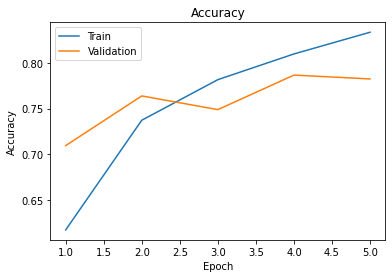

In [0]:
plot_learningCurve(history)


###Adding batch normalization and drop out layers to VGG16

In [0]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal',input_shape=(img_width,img_height,3)))

model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(MaxPool2D(2,2))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))

model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(MaxPool2D(2,2))


model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))

model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer='he_normal'))

model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))

model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))


opt=SGD(learning_rate=0.01,momentum=0.9)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

history=model.fit_generator(generator=train_generator,steps_per_epoch=len(train_generator),epochs=20,validation_data=validation_generator
                            ,validation_steps=len(validation_generator),verbose=1)

Epoch 1/20
1000/1000 [==============================] - 65s 65ms/step - loss: 0.6323 - accuracy: 0.6588 - val_loss: 0.6649 - val_accuracy: 0.6748
Epoch 2/20
1000/1000 [==============================] - 64s 64ms/step - loss: 0.5333 - accuracy: 0.7335 - val_loss: 0.5569 - val_accuracy: 0.7404
Epoch 3/20
1000/1000 [==============================] - 64s 64ms/step - loss: 0.4723 - accuracy: 0.7757 - val_loss: 0.4984 - val_accuracy: 0.7602
Epoch 4/20
1000/1000 [==============================] - 63s 63ms/step - loss: 0.4423 - accuracy: 0.7950 - val_loss: 0.5328 - val_accuracy: 0.7420
Epoch 5/20
1000/1000 [==============================] - 65s 65ms/step - loss: 0.4071 - accuracy: 0.8163 - val_loss: 0.6171 - val_accuracy: 0.7132
Epoch 6/20
1000/1000 [==============================] - 65s 65ms/step - loss: 0.3813 - accuracy: 0.8275 - val_loss: 0.5154 - val_accuracy: 0.7484
Epoch 7/20
1000/1000 [==============================] - 64s 64ms/step - loss: 0.3608 - accuracy: 0.8399 - val_loss: 0.4425 -